In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
prem1 = pd.read_csv('prem2324.csv')
prem1['Season'] = '2023-2024'
prem2 = pd.read_csv('prem2223.csv')
prem2['Season'] = '2022-2023'
prem3 = pd.read_csv('prem2122.csv')
prem3['Season'] = '2021-2022'

ligue1 = pd.read_csv('ligue2324.csv')
ligue1['Season'] = '2023-2024'
ligue2 = pd.read_csv('ligue2223.csv')
ligue2['Season'] = '2022-2023'
ligue3 = pd.read_csv('ligue2122.csv')
ligue3['Season'] = '2021-2022'

bundes1 = pd.read_csv('bundesliga2324.csv')
bundes1['Season'] = '2023-2024'
bundes2 = pd.read_csv('bundesliga2223.csv')
bundes2['Season'] = '2022-2023'
bundes3 = pd.read_csv('bundesliga2122.csv')
bundes3['Season'] = '2021-2022'

In [7]:
EPL = pd.concat([prem1, prem2, prem3])
BL = pd.concat([bundes1, bundes2, bundes3])
L1 = pd.concat([ligue1, ligue2, ligue3])

In [9]:
EPL['MP'] = EPL['W'] + EPL['L'] + EPL['D']
BL['MP'] = BL['W'] + BL['L'] + BL['D']
L1['MP'] = L1['W'] + L1['L'] + L1['D']

In [11]:
EPL['W%'] = (EPL['W'] + 0.5 * EPL['D']) / (EPL['MP'])
BL['W%'] = (BL['W'] + 0.5 * BL['D']) / (BL['MP'])
L1['W%'] = (L1['W'] + 0.5 * L1['D']) / (L1['MP'])

In [13]:
EPL['W%'] = round(EPL['W%'] * 100, 2)
BL['W%'] = round(BL['W%'] * 100, 2)
L1['W%'] = round(L1['W%'] * 100, 2)

In [15]:
EPL_data_test = EPL[['Team','Goals','Possession%', 'W%']]

In [17]:
pairplot = sns.pairplot(EPL_data_test, diag_kind='hist', kind='reg')

In [19]:
serie1 = pd.read_csv('serie2324.csv')
serie1['Season'] = '2023-2024'
serie2 = pd.read_csv('serie2223.csv')
serie2['Season'] = '2022-2023'
serie3 = pd.read_csv('serie2122.csv')
serie3['Season'] = '2021-2022'

laliga1 = pd.read_csv('laliga2324.csv')
laliga1['Season'] = '2023-2024'
laliga2 = pd.read_csv('laliga2223.csv')
laliga2['Season'] = '2022-2023'
laliga3 = pd.read_csv('laliga2122.csv')
laliga3['Season'] = '2021-2022'

mls1 = pd.read_csv('mls24.csv')
mls1['Season'] = '2024'
mls2 = pd.read_csv('mls23.csv')
mls2['Season'] = '2023'
mls3 = pd.read_csv('mls22.csv')
mls3['Season'] = '2022'

seriea = pd.concat([serie1, serie2, serie3])
laliga = pd.concat([laliga1, laliga2, laliga3])
mls = pd.concat([mls1, mls2, mls3])

In [21]:
seriea['MP'] = seriea['W'] + seriea['L'] + seriea['D']
laliga['MP'] = laliga['W'] + laliga['L'] + laliga['D']
mls['MP'] = mls['W'] + mls['L'] + mls['D']

seriea['W%'] = (seriea['W'] + 0.5 * seriea['D']) / (seriea['MP'])
laliga['W%'] = (laliga['W'] + 0.5 * laliga['D']) / (laliga['MP'])
mls['W%'] = (mls['W'] + 0.5 * mls['D']) / (mls['MP'])

In [23]:
seriea['W%'] = round(seriea['W%'] * 100, 2)
laliga['W%'] = round(laliga['W%'] * 100, 2)
mls['W%'] = round(mls['W%'] * 100, 2)

In [25]:
seriea['League'] = 'Serie A (ITA)'
L1['League'] = 'Ligue 1 (FRA)'
laliga['League'] = 'La Liga (ESP)'
mls['League'] = 'Major League Soccer (USA)'
EPL['League'] = 'Premier League (ENG)'
BL['League'] = 'Bundesliga (GER)'

In [27]:
all_leagues = pd.concat([EPL, BL, L1, seriea, laliga, mls], ignore_index=True)

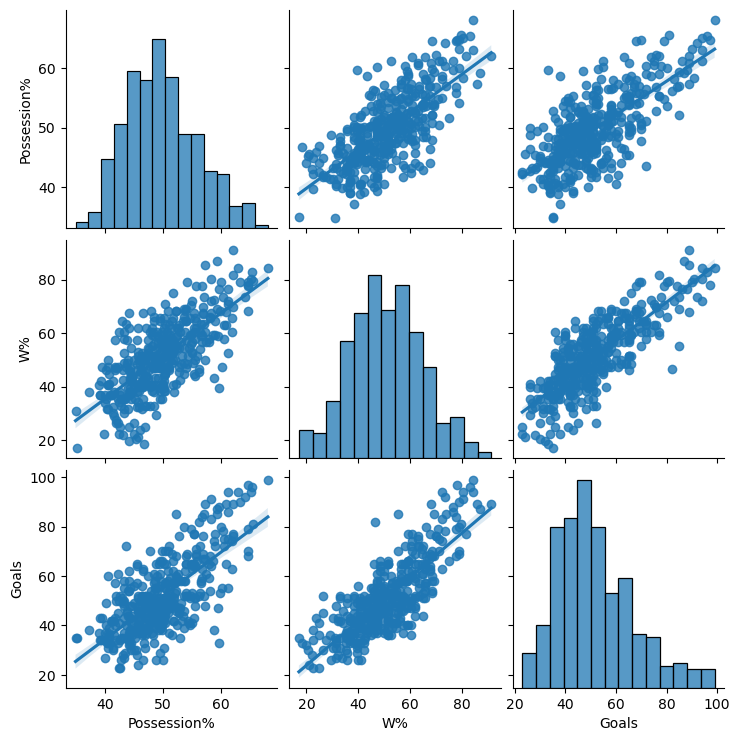

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming all_leagues is already loaded

# Remove missing rows
all_leagues = all_leagues.dropna()

# Select only relevant columns
relevant_columns = ['Possession%', 'W%', 'Goals']
all_leagues_subset = all_leagues[relevant_columns]

# Generate pairplot for the selected columns
pairplot = sns.pairplot(all_leagues_subset, diag_kind='hist', kind='reg')

# Show the plot
plt.show()

# Save the pairplot as a PDF
pairplot.savefig("pairplot_all_leagues2.pdf")

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='League', ylabel='Possession%'>

Text(0.5, 1.0, 'Possession Distribution Across Leagues')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Premier League (ENG)'),
  Text(1, 0, 'Bundesliga (GER)'),
  Text(2, 0, 'Ligue 1 (FRA)'),
  Text(3, 0, 'Serie A (ITA)'),
  Text(4, 0, 'La Liga (ESP)'),
  Text(5, 0, 'Major League Soccer (USA)')])

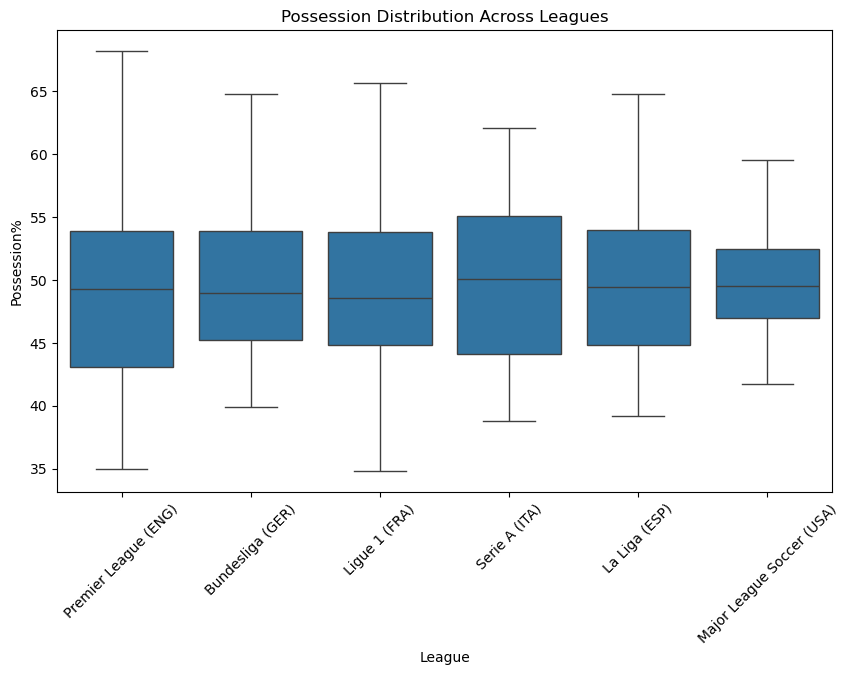

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='League', y='Possession%', data=all_leagues)
plt.title('Possession Distribution Across Leagues')
plt.xticks(rotation=45)

plt.savefig(f'boxplot.png', bbox_inches='tight')

plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Possession%', ylabel='W%'>

Text(0.5, 1.0, 'Possession vs. Winning Percentage')

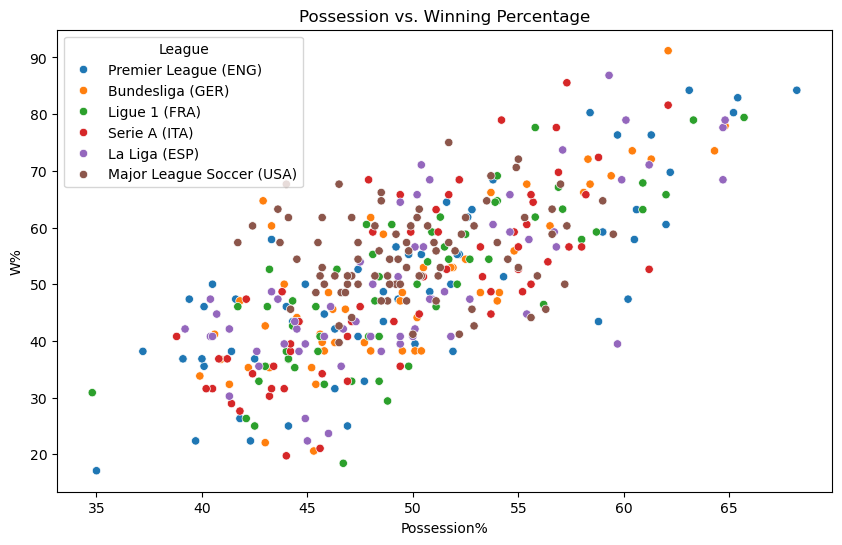

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Possession%', y='W%', data=all_leagues, hue='League')
plt.title('Possession vs. Winning Percentage')

plt.savefig(f'possessionvsWP.png', bbox_inches='tight')

plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

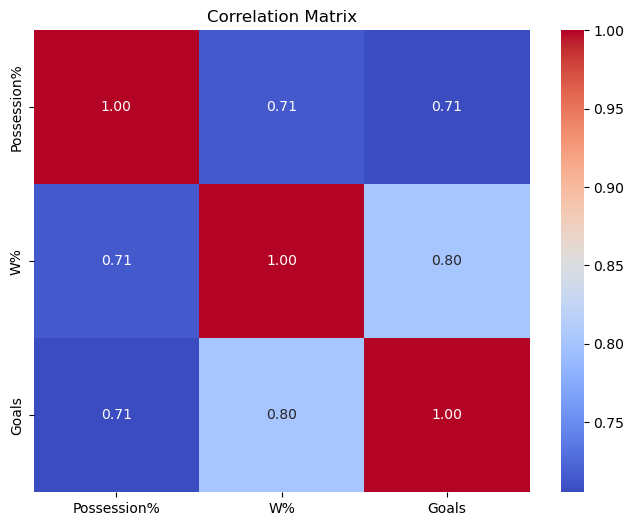

In [89]:
correlation_matrix = all_leagues[['Possession%', 'W%', 'Goals']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Premier League (ENG)')

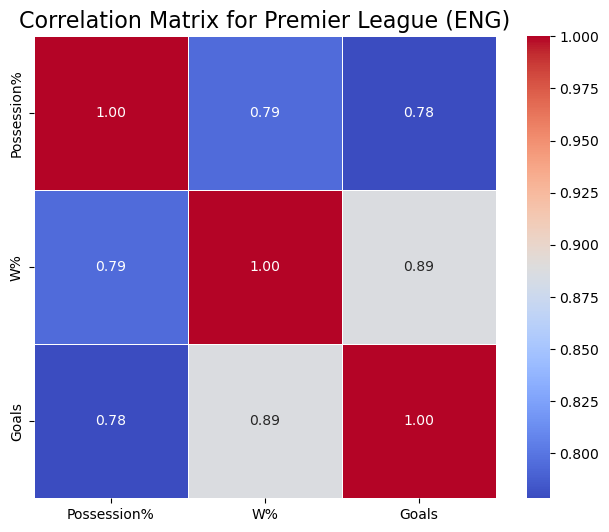

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Bundesliga (GER)')

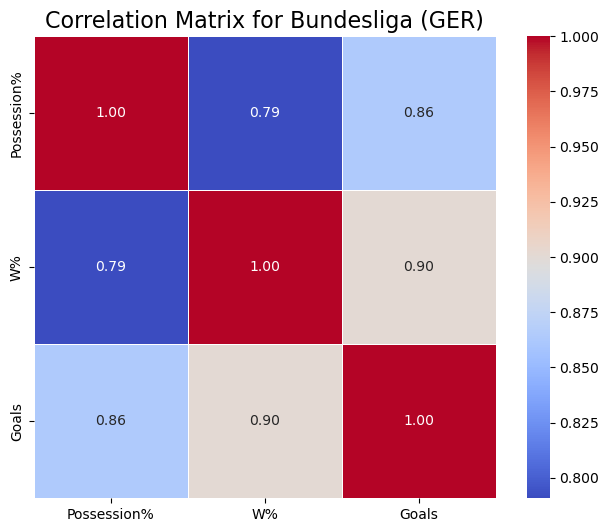

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Ligue 1 (FRA)')

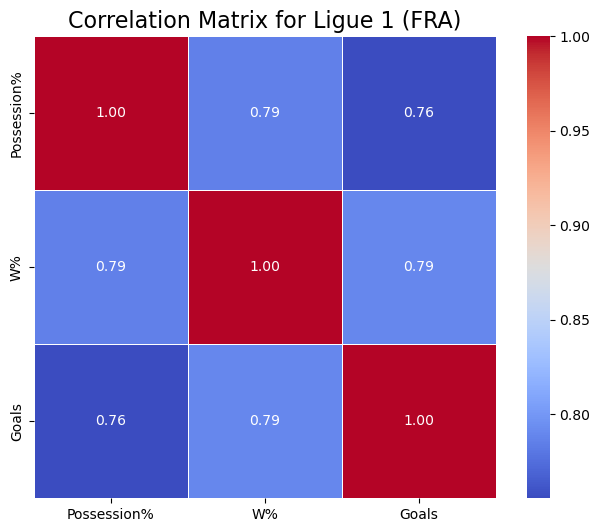

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Serie A (ITA)')

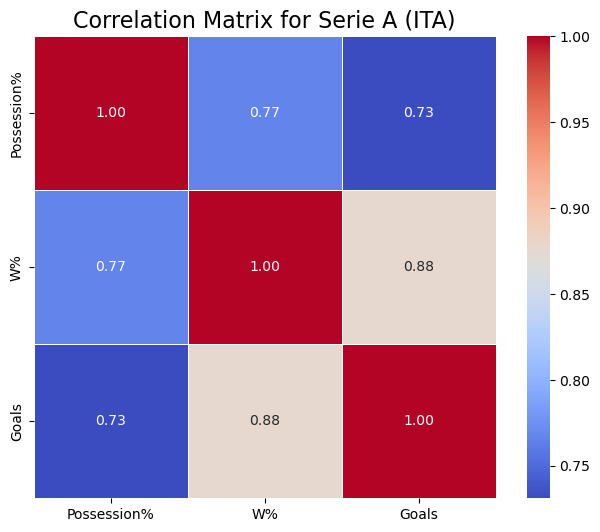

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for La Liga (ESP)')

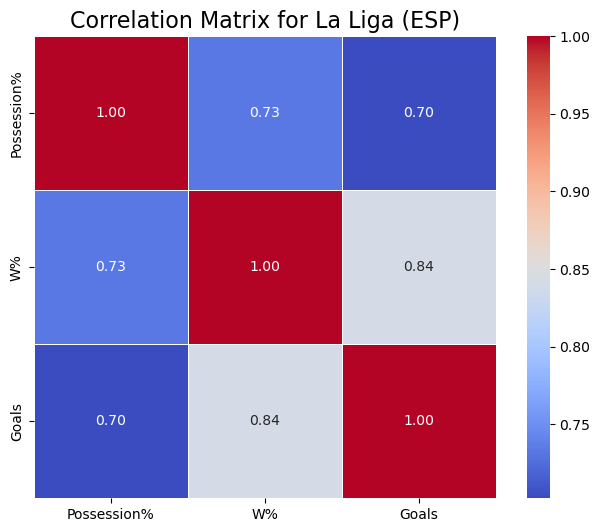

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Major League Soccer (USA)')

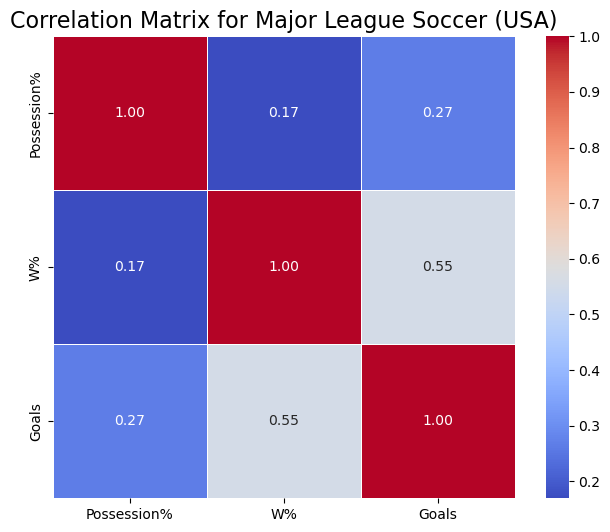

In [49]:
from scipy.stats import pearsonr

# Create a list of all leagues
leagues = all_leagues['League'].unique()

# Loop through each league and create a correlation matrix for it
for league in leagues:
    # Filter data for the current league
    league_data = all_leagues[all_leagues['League'] == league]

    # Select relevant columns for correlation (Possession%, W%, and Goals)
    league_corr_data = league_data[['Possession%', 'W%', 'Goals']]

    # Calculate the correlation matrix
    corr_matrix = league_corr_data.corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)

    # Set the title to include the league name
    plt.title(f'Correlation Matrix for {league}', fontsize=16)
    
    # Save the plot to a file
    plt.savefig(f'correlation_matrix_{league}.png', bbox_inches='tight')  # Save as PNG, you can change the format if needed
    
    
    # Display the heatmap
    plt.show()

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/3483570475.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_wins = all_leagues.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/3483570475.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sorted, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

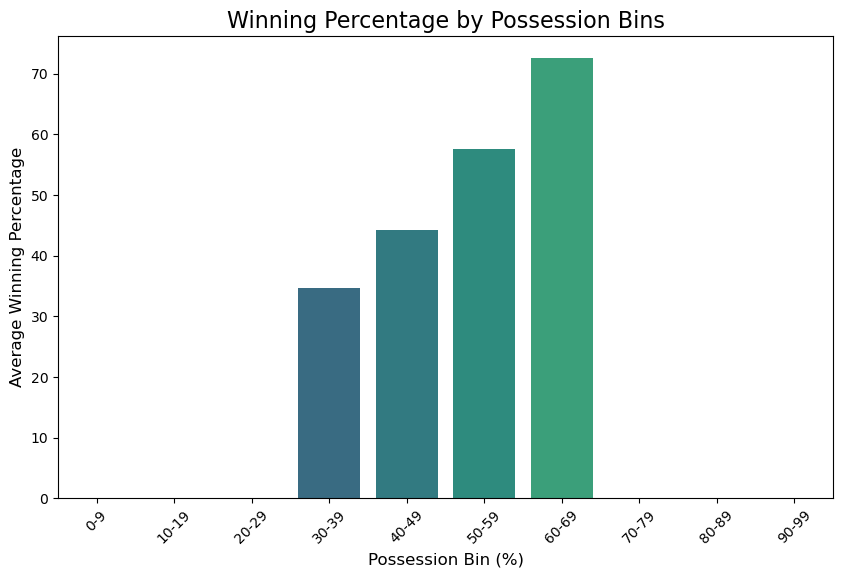

  Possession Bin         W%
6          60-69  72.562963
5          50-59  57.569178
4          40-49  44.295282
3          30-39  34.629000
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create 10% possession bins (e.g., 0-10, 11-20, 21-30, etc.)
bins = list(range(0, 101, 10))
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # '0-9', '10-19', ..., '90-99'

# Add a new column to categorize teams into these bins
all_leagues['Possession Bin'] = pd.cut(all_leagues['Possession%'], bins=bins, labels=labels, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_wins = all_leagues.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sorted = bin_wins.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sorted, palette='viridis')

# Title and labels
plt.title('Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('winning_percentage_by_possession_bins.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sorted)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/724913021.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_wins2 = EPL.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/724913021.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sorted2, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'EPL Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

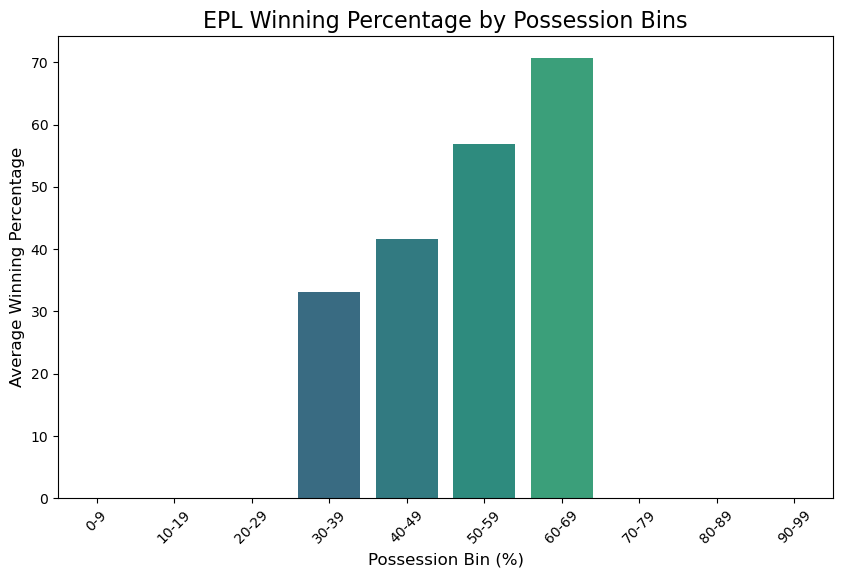

  Possession Bin         W%
6          60-69  70.658000
5          50-59  56.870556
4          40-49  41.649615
3          30-39  33.115000
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create 10% possession bins (e.g., 0-10, 11-20, 21-30, etc.)
bins2 = list(range(0, 101, 10))  # Create bins from 0-10, 10-20, ..., 90-100
labels2 = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # '0-9', '10-19', ..., '90-99'

# Add a new column to categorize teams into these bins
EPL['Possession Bin'] = pd.cut(EPL['Possession%'], bins=bins2, labels=labels2, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_wins2 = EPL.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sorted2 = bin_wins2.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sorted2, palette='viridis')

# Title and labels
plt.title('EPL Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsEPL.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the results
print(bin_wins_sorted2)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/804408805.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_winsBL = BL.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/804408805.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedBL, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'BL Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

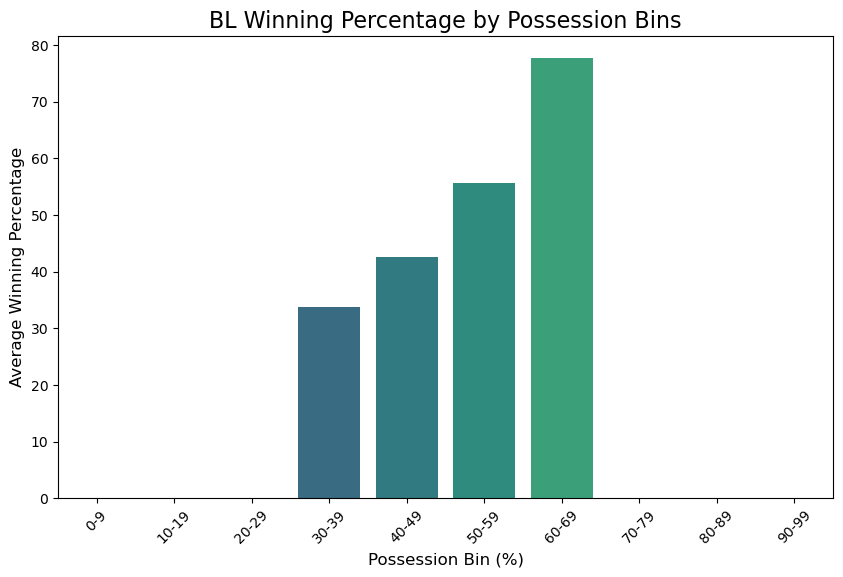

  Possession Bin         W%
6          60-69  77.648000
5          50-59  55.720000
4          40-49  42.600667
3          30-39  33.820000
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [45]:
# Add a new column to categorize teams into these bins
BL['Possession Bin'] = pd.cut(BL['Possession%'], bins=bins2, labels=labels2, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_winsBL = BL.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sortedBL = bin_winsBL.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedBL, palette='viridis')

# Title and labels
plt.title('BL Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsBL.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sortedBL)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/586328365.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_winsMLS = mls.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/586328365.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedMLS, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'MLS Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

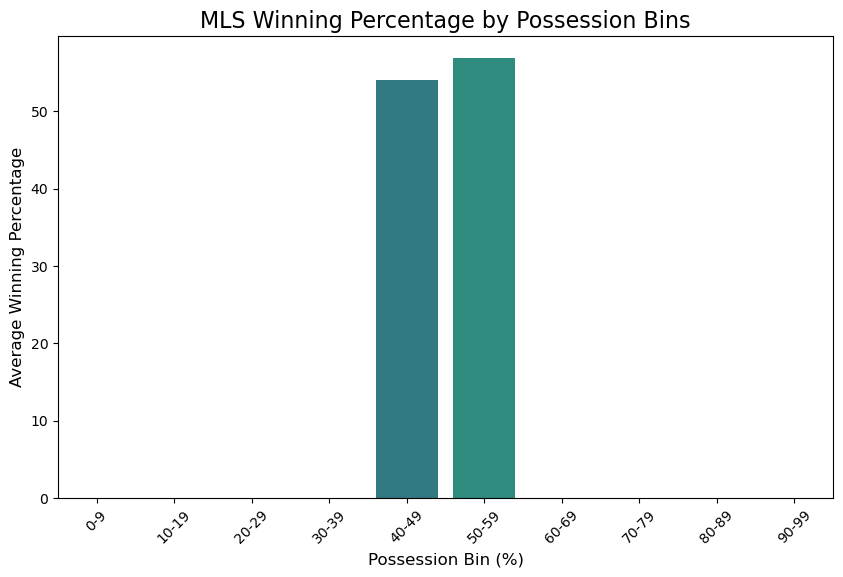

  Possession Bin         W%
5          50-59  56.849474
4          40-49  54.074167
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
3          30-39        NaN
6          60-69        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [37]:
# Add a new column to categorize teams into these bins
mls['Possession Bin'] = pd.cut(mls['Possession%'], bins=bins2, labels=labels, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_winsMLS = mls.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sortedMLS = bin_winsMLS.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedMLS, palette='viridis')

# Title and labels
plt.title('MLS Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsMLS.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sortedMLS)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/2429937409.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_winsL1 = L1.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/2429937409.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedL1, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'L1 Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

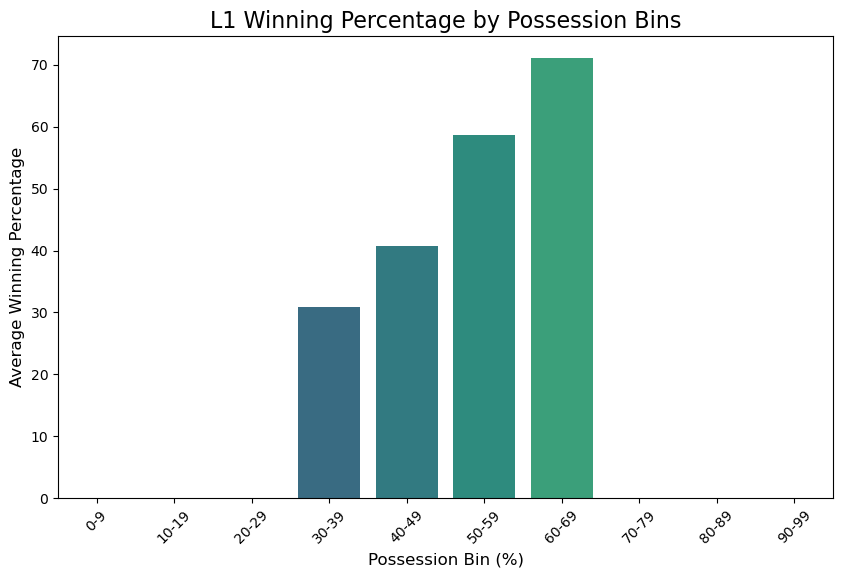

  Possession Bin         W%
6          60-69  71.034000
5          50-59  58.634762
4          40-49  40.646774
3          30-39  30.880000
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [39]:
# Add a new column to categorize teams into these bins
L1['Possession Bin'] = pd.cut(L1['Possession%'], bins=bins2, labels=labels2, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_winsL1 = L1.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sortedL1 = bin_winsL1.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedL1, palette='viridis')

# Title and labels
plt.title('L1 Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsL1.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sortedL1)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/581738012.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_winsSA = seriea.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/581738012.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedSA, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'SA Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

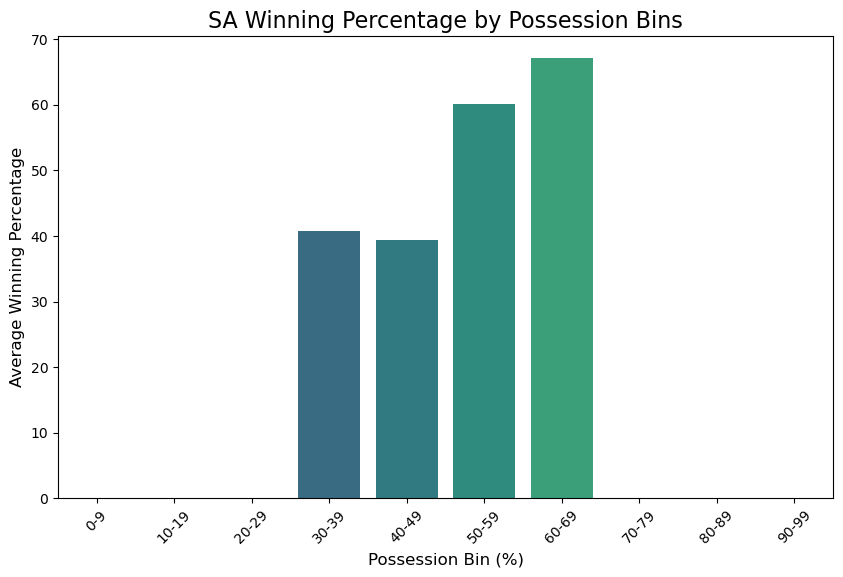

  Possession Bin         W%
6          60-69  67.105000
5          50-59  60.057143
3          30-39  40.790000
4          40-49  39.427931
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [41]:
# Add a new column to categorize teams into these bins
seriea['Possession Bin'] = pd.cut(seriea['Possession%'], bins=bins2, labels=labels2, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_winsSA = seriea.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sortedSA = bin_winsSA.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedSA, palette='viridis')

# Title and labels
plt.title('SA Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsSA.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sortedSA)

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/1951925016.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_winsLL = laliga.groupby('Possession Bin')['W%'].mean().reset_index()


<Figure size 1000x600 with 0 Axes>

/var/folders/ld/z3r02wrj45947866jp502njw0000gn/T/ipykernel_30571/1951925016.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedLL, palette='viridis')


<Axes: xlabel='Possession Bin', ylabel='W%'>

Text(0.5, 1.0, 'LaLiga Winning Percentage by Possession Bins')

Text(0.5, 0, 'Possession Bin (%)')

Text(0, 0.5, 'Average Winning Percentage')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-9'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, '80-89'),
  Text(9, 0, '90-99')])

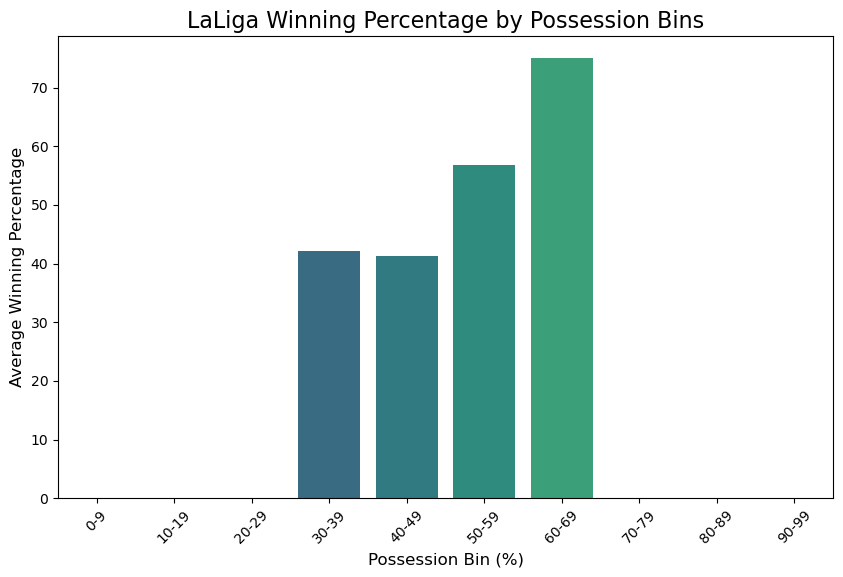

  Possession Bin         W%
6          60-69  75.000000
5          50-59  56.750435
3          30-39  42.110000
4          40-49  41.214516
0            0-9        NaN
1          10-19        NaN
2          20-29        NaN
7          70-79        NaN
8          80-89        NaN
9          90-99        NaN


In [43]:
# Add a new column to categorize teams into these bins
laliga['Possession Bin'] = pd.cut(laliga['Possession%'], bins=bins2, labels=labels2, right=False)

# Group by the 'Possession Bin' and calculate the average winning percentage for each bin
bin_winsLL = laliga.groupby('Possession Bin')['W%'].mean().reset_index()

# Sort by the winning percentage
bin_wins_sortedLL = bin_winsLL.sort_values(by='W%', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Possession Bin', y='W%', data=bin_wins_sortedLL, palette='viridis')

# Title and labels
plt.title('LaLiga Winning Percentage by Possession Bins', fontsize=16)
plt.xlabel('Possession Bin (%)', fontsize=12)
plt.ylabel('Average Winning Percentage', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.savefig('binsLiga.png', bbox_inches='tight')

# Show the plot
plt.show()

# Display the sorted results
print(bin_wins_sortedLL)